In [2]:
import pandas as pd

# Load datasets with specified encoding to handle UnicodeDecodeError
injury_history = pd.read_csv(r'C:\APPLIED DATA SCIENCE(1ST SEM)\OTHER DOCUMENTS\PERSONAL PROJECTS\SPORTS ANALYTICS\injury_history(injury_history).csv', encoding='ISO-8859-1')
muscle_imbalance = pd.read_csv(r'C:\APPLIED DATA SCIENCE(1ST SEM)\OTHER DOCUMENTS\PERSONAL PROJECTS\SPORTS ANALYTICS\injury_history(muscle_imbalance_data).csv', encoding='ISO-8859-1')
player_sessions = pd.read_csv(r'C:\APPLIED DATA SCIENCE(1ST SEM)\OTHER DOCUMENTS\PERSONAL PROJECTS\SPORTS ANALYTICS\injury_history(player_sessions).csv', encoding='ISO-8859-1')

# Display column names to verify date-related columns
print("Injury History Columns:", injury_history.columns)
print("Muscle Imbalance Columns:", muscle_imbalance.columns)
print("Player Sessions Columns:", player_sessions.columns)



Injury History Columns: Index(['Player.ID', 'Name', 'Group.Id', 'Injury Type', 'Body Part', 'Side',
       'Injury Date', 'Severity', 'Recovery Time (days)', 'Additional Notes'],
      dtype='object')
Muscle Imbalance Columns: Index(['Player.ID', 'Session ID', 'Player Name', 'Date Recorded',
       'Hamstring To Quad Ratio', 'Quad Imbalance Percent',
       'HamstringImbalance Percent', 'Calf Imbalance Percent',
       'Groin Imbalance Percent'],
      dtype='object')
Player Sessions Columns: Index(['Name', 'Player.ID', 'Group.Id', 'Group.name', 'League.ID',
       'Session.ID', 'Session_Date', 'Position', 'Distance..mi.',
       'Distance...min..mi.', 'Duration..s.', 'Steps', 'Speed....of.max......',
       'Speed..max....mph.', 'Speed..?ò...mph.', 'Time..s.',
       'Accumulated.Acceleration.Load', 'Anaerobic.Activity..distance...mi.',
       'Jump.Load..J.', 'Heart.Rate..?ò...bpm.', 'Heart.Rate..min....bpm.',
       'Heart.Rate..max....bpm.', 'Human.Core.Temperature..?ò....F.',
    

In [3]:
import pandas as pd

# Load datasets with specified encoding to handle UnicodeDecodeError
injury_history = pd.read_csv(r'C:\APPLIED DATA SCIENCE(1ST SEM)\OTHER DOCUMENTS\PERSONAL PROJECTS\SPORTS ANALYTICS\injury_history(injury_history).csv', encoding='ISO-8859-1')
muscle_imbalance = pd.read_csv(r'C:\APPLIED DATA SCIENCE(1ST SEM)\OTHER DOCUMENTS\PERSONAL PROJECTS\SPORTS ANALYTICS\injury_history(muscle_imbalance_data).csv', encoding='ISO-8859-1')
player_sessions = pd.read_csv(r'C:\APPLIED DATA SCIENCE(1ST SEM)\OTHER DOCUMENTS\PERSONAL PROJECTS\SPORTS ANALYTICS\injury_history(player_sessions).csv', encoding='ISO-8859-1')

# Standardize column names
injury_history.rename(columns={'Player.ID': 'Player_ID', 'Injury Date': 'Date'}, inplace=True)
muscle_imbalance.rename(columns={'Player.ID': 'Player_ID', 'Date Recorded': 'Date'}, inplace=True)
player_sessions.rename(columns={'Player.ID': 'Player_ID', 'Session_Date': 'Date'}, inplace=True)

# Merge datasets on 'Player_ID' and 'Date'
merged_data = injury_history.merge(muscle_imbalance, on=['Player_ID', 'Date'], how='outer')
merged_data = merged_data.merge(player_sessions, on=['Player_ID', 'Date'], how='outer')

# Display merged data info
print(merged_data.info())
print(merged_data.head())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2721 entries, 0 to 2720
Data columns (total 45 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Player_ID                           2721 non-null   int64  
 1   Name_x                              21 non-null     object 
 2   Group.Id_x                          21 non-null     float64
 3   Injury Type                         21 non-null     object 
 4   Body Part                           21 non-null     object 
 5   Side                                16 non-null     object 
 6   Date                                2721 non-null   object 
 7   Severity                            11 non-null     object 
 8   Recovery Time (days)                21 non-null     float64
 9   Additional Notes                    21 non-null     object 
 10  Session ID                          182 non-null    float64
 11  Player Name                         182 non

In [4]:
print(merged_data.columns)


Index(['Player_ID', 'Name_x', 'Group.Id_x', 'Injury Type', 'Body Part', 'Side',
       'Date', 'Severity', 'Recovery Time (days)', 'Additional Notes',
       'Session ID', 'Player Name', 'Hamstring To Quad Ratio',
       'Quad Imbalance Percent', 'HamstringImbalance Percent',
       'Calf Imbalance Percent', 'Groin Imbalance Percent', 'Name_y',
       'Group.Id_y', 'Group.name', 'League.ID', 'Session.ID', 'Position',
       'Distance..mi.', 'Distance...min..mi.', 'Duration..s.', 'Steps',
       'Speed....of.max......', 'Speed..max....mph.', 'Speed..?ò...mph.',
       'Time..s.', 'Accumulated.Acceleration.Load',
       'Anaerobic.Activity..distance...mi.', 'Jump.Load..J.',
       'Heart.Rate..?ò...bpm.', 'Heart.Rate..min....bpm.',
       'Heart.Rate..max....bpm.', 'Human.Core.Temperature..?ò....F.',
       'Human.Core.Temperature..max.....F.', 'TRIMP', 'Heart.Rate.Recoveries',
       'Jump.Height..max....ft.', 'Changes.of.Orientation', 'Exertions',
       'Disk.Usage....'],
      dtype=

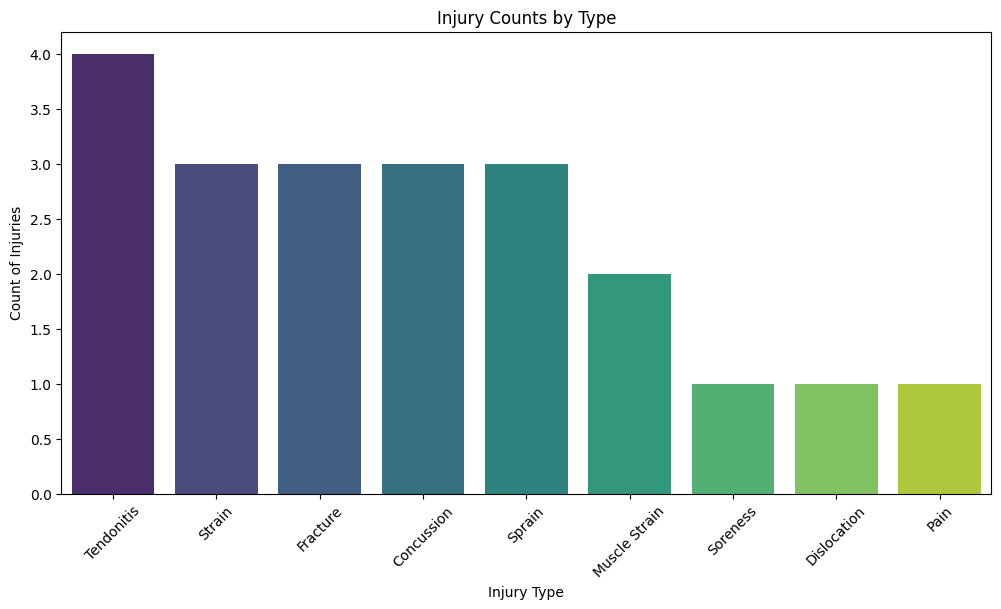

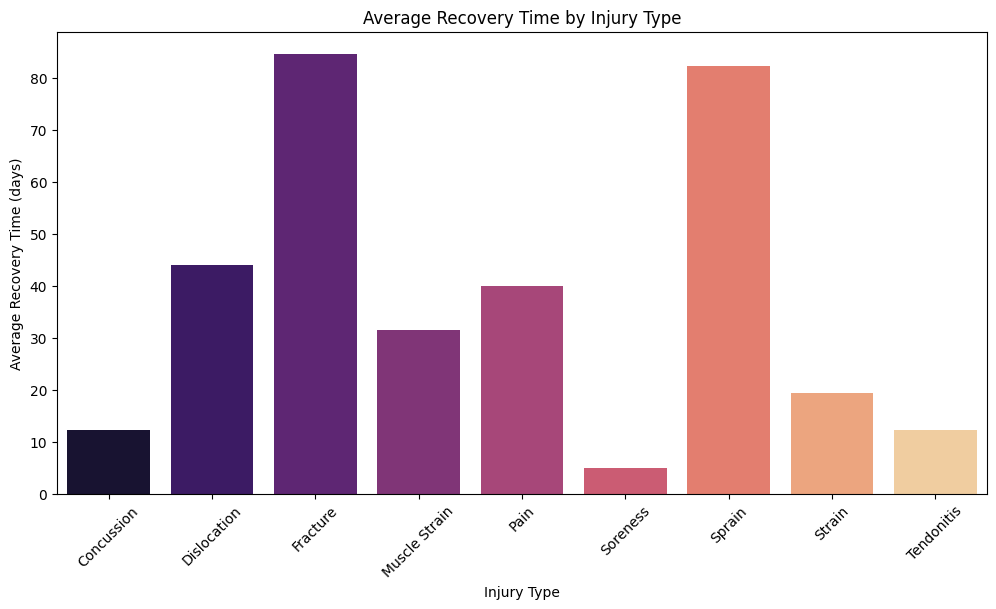

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming merged_data is already defined with columns 'Injury Type' and 'Recovery Time (days)'

# Calculate injury counts and average recovery times
injury_counts = merged_data['Injury Type'].value_counts()
avg_recovery_time = merged_data.groupby('Injury Type')['Recovery Time (days)'].mean()

# Plotting the counts of each injury type
plt.figure(figsize=(12, 6))
sns.barplot(x=injury_counts.index, y=injury_counts.values, palette="viridis")
plt.xlabel('Injury Type')
plt.ylabel('Count of Injuries')
plt.title('Injury Counts by Type')
plt.xticks(rotation=45)
plt.show()

# Plotting the average recovery time for each injury type
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_recovery_time.index, y=avg_recovery_time.values, palette="magma")
plt.xlabel('Injury Type')
plt.ylabel('Average Recovery Time (days)')
plt.title('Average Recovery Time by Injury Type')
plt.xticks(rotation=45)
plt.show()


In [12]:
# Count of injury types
injury_counts = merged_data['Injury Type'].value_counts()
print("Injury Counts:\n", injury_counts)

# Average recovery time for each injury type
avg_recovery_time = merged_data.groupby('Injury Type')['Recovery Time (days)'].mean()
print("Average Recovery Time by Injury Type:\n", avg_recovery_time)


Injury Counts:
 Injury Type
Tendonitis       4
Strain           3
Fracture         3
Concussion       3
Sprain           3
Muscle Strain    2
Soreness         1
Dislocation      1
Pain             1
Name: count, dtype: int64
Average Recovery Time by Injury Type:
 Injury Type
Concussion       12.333333
Dislocation      44.000000
Fracture         84.666667
Muscle Strain    31.500000
Pain             40.000000
Soreness          5.000000
Sprain           82.333333
Strain           19.333333
Tendonitis       12.250000
Name: Recovery Time (days), dtype: float64


In [13]:
# Fill missing values
merged_data.fillna(0, inplace=True)

# Sample features based on available data for injury prediction
health_metrics = [
    'Quad Imbalance Percent', 'HamstringImbalance Percent', 
    'Calf Imbalance Percent', 'Groin Imbalance Percent', 
    'Heart.Rate..?ò...bpm.', 'Speed..max....mph.'
]

# Target variable (for example, whether an injury occurred)
merged_data['Injury_Occurred'] = merged_data['Injury Type'].apply(lambda x: 1 if x != 0 else 0)
features = merged_data[health_metrics]
target = merged_data['Injury_Occurred']


In [9]:
import plotly.express as px

# Creating an interactive violin plot with Plotly for 'Quad Imbalance Percent' by player ('Name_x')
fig = px.violin(merged_data, x='Name_x', y='Quad Imbalance Percent', box=True, points="all",
                title='Quad Imbalance Percent by Player',
                labels={'Name_x': 'Player', 'Quad Imbalance Percent': 'Quad Imbalance Percent'})

# Update layout for better readability
fig.update_layout(xaxis_tickangle=-90, width=1000, height=600)

# Display the interactive plot
fig.show()


Some players, specifically Anthony Lopez, Julian Simmons, and Brandon Mitchell, have notable positive or negative values, indicating higher quad imbalance percentages. This suggests these players may have a stronger imbalance compared to others.

Julian Simmons: The box plot for Julian Simmons is unique among the players, showing a narrow interquartile range (IQR) around the 0% imbalance mark. This implies that his quad imbalance measurements are relatively consistent and close to zero, with less variation.

Significant Imbalances: The scattered data points on the right side for Anthony Lopez and Brandon Mitchell show high positive values, indicating that these players have significant quad imbalances. Similarly, one data point above 10% for Lennon Van suggests a moderate positive imbalance for him.

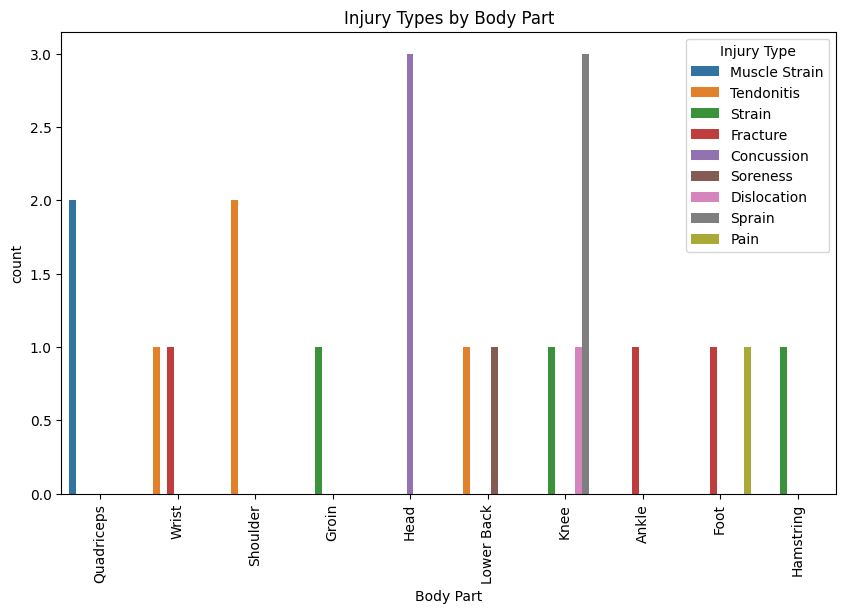

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(data=injury_history, x='Body Part', hue='Injury Type')
plt.title('Injury Types by Body Part')
plt.xticks(rotation=90)
plt.show()




1. **Focus Areas for Prevention**:
   - **Quadriceps** and **shoulder** injuries show occurrences of muscle strains and tendonitis. Since these muscles are heavily engaged in running, jumping, and shooting, implementing specific strengthening and flexibility routines for these areas could help reduce injury risk.
   
2. **Concussions (Head)**:
   - The head has a high count of concussions, which could indicate accidental contact during games. This highlights the need for increased awareness and protective strategies, especially for players driving aggressively to the basket or defending in the paint.
   
3. **Knee and Ankle Stability**:
   - The **knee** shows occurrences of dislocations and sprains, while the **ankle** has cases of strains and fractures. Given the quick directional changes and pivoting in basketball, focusing on balance and stability training could help in reducing knee and ankle injuries.

4. **Other Notable Areas**:
   - The **wrist** has instances of fractures and tendonitis, which could be linked to shooting mechanics or falls. Improving fall techniques and wrist strength can be preventive here.
   - **Hamstrings** and **lower back** injuries reflect soreness and strain, indicating potential overuse. Managing training loads and ensuring adequate rest for players could be beneficial.



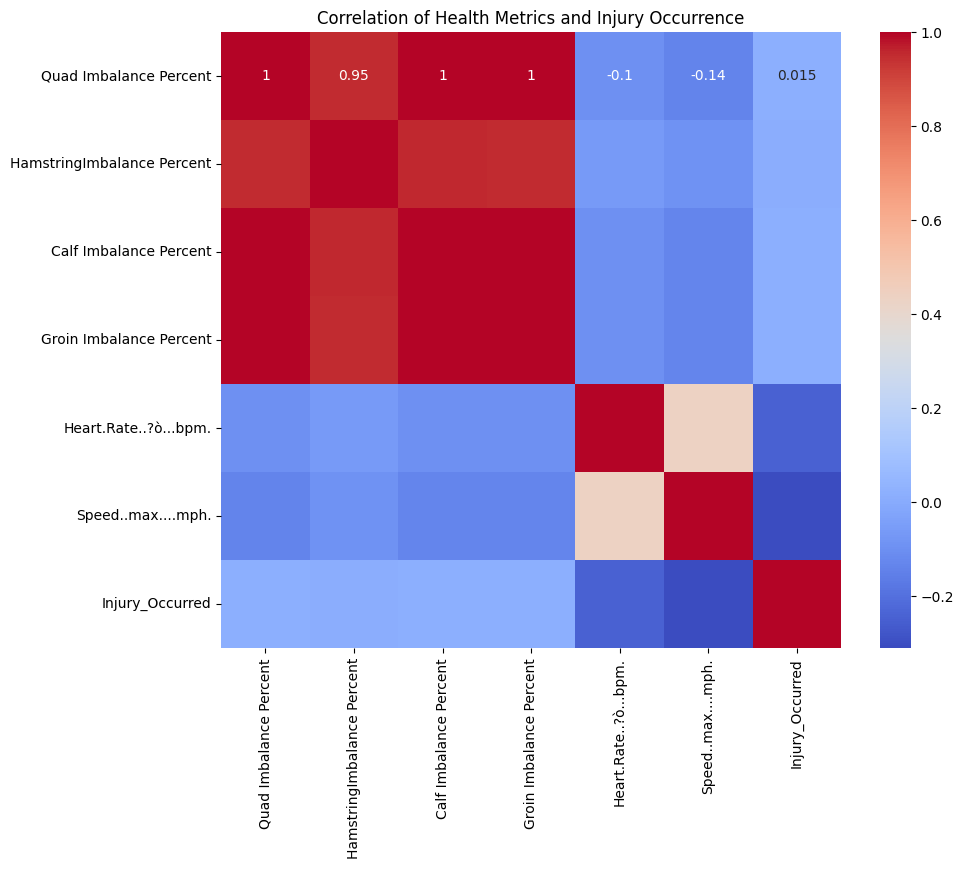

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(merged_data[health_metrics + ['Injury_Occurred']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation of Health Metrics and Injury Occurrence')
plt.show()


## 1 Basic RandomForest Model with Train-Test Split
Code: It splits the dataset into training and test sets, trains a basic RandomForest model, and evaluates using classification_report.
Output: The accuracy is very high, but there is a major imbalance in predicting classes (precision for one class is low).
Pros: Simple and quick to implement.
Cons: Doesn't address class imbalance and lacks hyperparameter tuning, leading to overfitting and unreliable predictions for minority classes.

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Split data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Injury Prediction Model Performance:\n", classification_report(y_test, y_pred))


Injury Prediction Model Performance:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       816
           1       0.25      1.00      0.40         1

    accuracy                           1.00       817
   macro avg       0.62      1.00      0.70       817
weighted avg       1.00      1.00      1.00       817



# 2 GridSearchCV with Feature Scaling
Code: Adds feature scaling and hyperparameter tuning with GridSearchCV to find the best model parameters.
Output: The model has better control over its complexity due to hyperparameter tuning. However, imbalance remains.
Pros: Hyperparameter tuning improves performance, and feature scaling standardizes the data.
Cons: Still doesn’t address class imbalance, making it unsuitable if the dataset is imbalanced.

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, target, test_size=0.3, random_state=42)

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model after hyperparameter tuning
best_model = grid_search.best_estimator_

# Cross-validation for a more robust model evaluation
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", np.mean(cv_scores))

# Predict and evaluate on test data
y_pred = best_model.predict(X_test)
print("Injury Prediction Model Performance:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': features.columns,
    'Importance': best_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importance:\n", feature_importance)


Cross-validation scores: [1.         0.99737533 0.99737533 0.99475066 1.        ]
Mean CV score: 0.9979002624671918
Injury Prediction Model Performance:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       816
           1       0.25      1.00      0.40         1

    accuracy                           1.00       817
   macro avg       0.62      1.00      0.70       817
weighted avg       1.00      1.00      1.00       817

Accuracy Score: 0.996328029375765
Confusion Matrix:
 [[813   3]
 [  0   1]]
Feature Importance:
                       Feature  Importance
0      Quad Imbalance Percent    0.193195
1  HamstringImbalance Percent    0.183857
5          Speed..max....mph.    0.182255
3     Groin Imbalance Percent    0.173218
4       Heart.Rate..?ò...bpm.    0.163160
2      Calf Imbalance Percent    0.104316


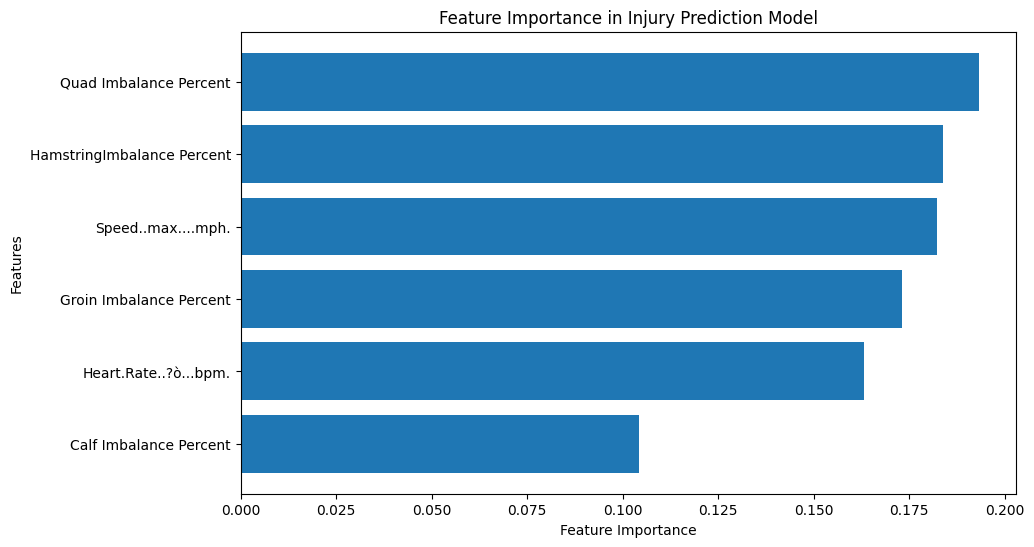

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': features.columns,
    'Importance': best_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], align='center')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Injury Prediction Model')
plt.gca().invert_yaxis()  # Invert y-axis for descending order
plt.show()


Cross-validation scores: [0.91111111 1.         0.99907407 1.         0.99907407]
Mean CV score: 0.9818518518518518
Injury Prediction Model Performance with SMOTE Oversampling:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       830
           1       0.99      1.00      1.00       790

    accuracy                           1.00      1620
   macro avg       1.00      1.00      1.00      1620
weighted avg       1.00      1.00      1.00      1620

Accuracy Score: 0.995679012345679
Confusion Matrix:
 [[823   7]
 [  0 790]]


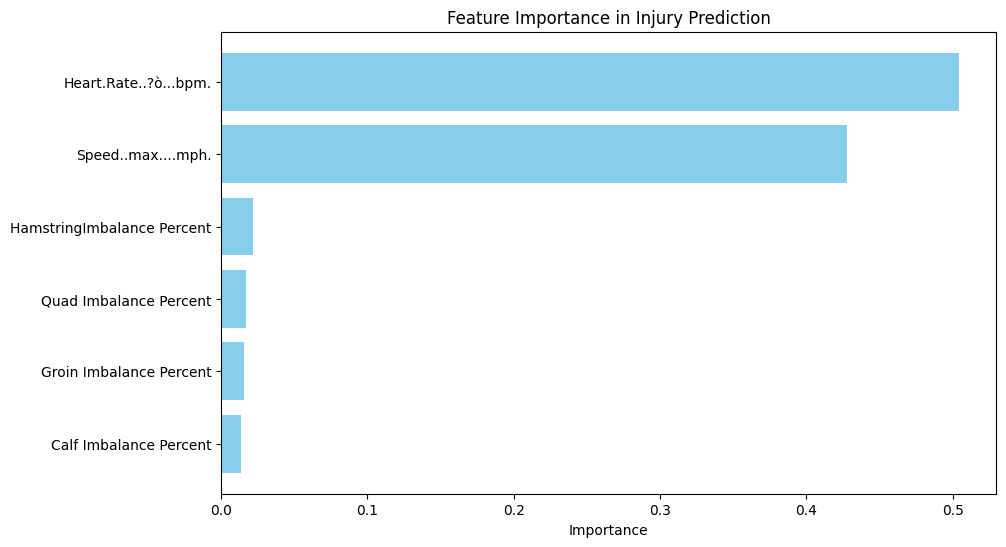

In [20]:
# Install libraries if not already installed
#!pip install -U scikit-learn imbalanced-learn matplotlib

# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Load and prepare your data
# Assuming 'features' is your feature DataFrame and 'target' is your label Series
# Replace these with the actual data loading code if necessary

# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(features, target)

# Split the resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Initialize and train the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Cross-validation scores
cv_scores = cross_val_score(rf_model, X_resampled, y_resampled, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())

# Predict on test set and evaluate
y_pred = rf_model.predict(X_test)
print("Injury Prediction Model Performance with SMOTE Oversampling:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Feature Importance Visualization
feature_importances = rf_model.feature_importances_
feature_names = features.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.title("Feature Importance in Injury Prediction")
plt.show()


Confusion Matrix:

True Negatives (823): Correctly predicted non-injury cases.
False Positives (7): Non-injuries predicted as injuries.
True Positives (790): Correctly predicted injuries.
False Negatives (0): No missed injuries, which is ideal for a health-focused model.
Accuracy Score: At nearly 99.6%, the model has an excellent balance of sensitivity and specificity for this dataset.


In [21]:
# Function to get all data related to a player by name
def get_player_details(player_name):
    # Filter each dataset based on player name
    injury_data = injury_history[injury_history['Name'] == player_name]
    imbalance_data = muscle_imbalance[muscle_imbalance['Player Name'] == player_name]
    session_data = player_sessions[player_sessions['Name'] == player_name]
    
    # Display data for the player
    print(f"Injury History for {player_name}:\n", injury_data if not injury_data.empty else "No injury data available.")
    print("\nMuscle Imbalance Data for {player_name}:\n", imbalance_data if not imbalance_data.empty else "No muscle imbalance data available.")
    print(f"\nPlayer Session Data for {player_name}:\n", session_data if not session_data.empty else "No session data available.")

# Get player name input
player_name = input("Enter the player's name: ")
get_player_details(player_name)

Injury History for Miles Richardson:
     Player_ID              Name  Group.Id Injury Type Body Part   Side  \
11        109  Miles Richardson       209  Tendonitis  Shoulder  Right   

        Date Severity  Recovery Time (days)  \
11  7/5/2023      NaN                     9   

                                     Additional Notes  
11  Rotator cuff tendonitis due to overuse. Anti-i...  

Muscle Imbalance Data for {player_name}:
      Player_ID  Session ID       Player Name       Date  \
143        109         101  Miles Richardson   1/1/2023   
144        109         102  Miles Richardson   2/1/2023   
145        109         103  Miles Richardson   3/1/2023   
146        109         104  Miles Richardson   4/1/2023   
147        109         105  Miles Richardson   5/1/2023   
148        109         106  Miles Richardson   6/1/2023   
149        109         107  Miles Richardson   7/1/2023   
150        109         108  Miles Richardson   8/1/2023   
151        109         109  Mile

Cross-validation scores: [0.75       0.98076923 0.96153846 0.5        1.        ]
Mean CV score: 0.8384615384615385
Injury Prediction Model Performance with SMOTE Oversampling:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        36
         1.0       1.00      1.00      1.00        42

    accuracy                           1.00        78
   macro avg       1.00      1.00      1.00        78
weighted avg       1.00      1.00      1.00        78

Accuracy Score: 1.0
Confusion Matrix:
 [[36  0]
 [ 0 42]]


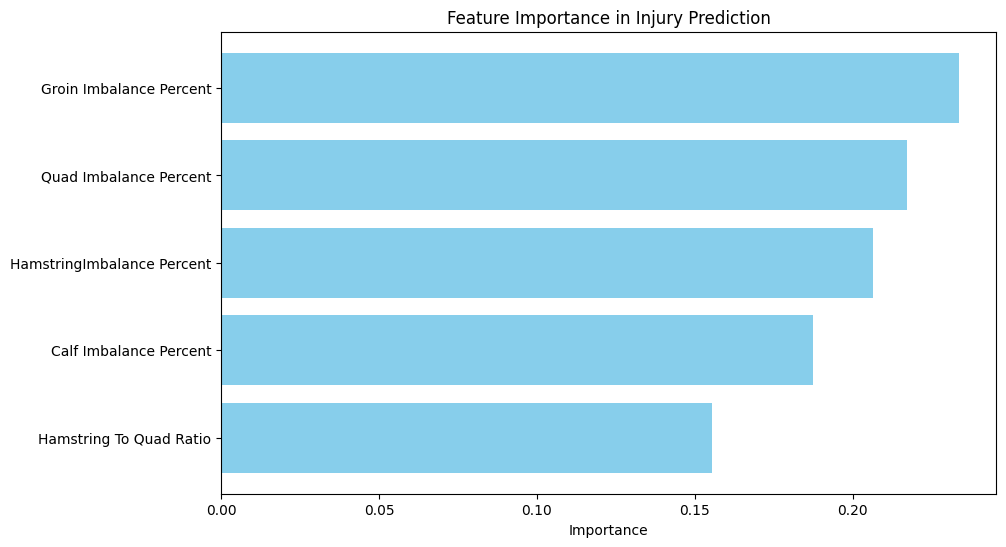

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Load datasets


injury_history = pd.read_csv(r'C:\APPLIED DATA SCIENCE(1ST SEM)\OTHER DOCUMENTS\PERSONAL PROJECTS\SPORTS ANALYTICS\injury_history(injury_history).csv', encoding='ISO-8859-1')
muscle_imbalance = pd.read_csv(r'C:\APPLIED DATA SCIENCE(1ST SEM)\OTHER DOCUMENTS\PERSONAL PROJECTS\SPORTS ANALYTICS\injury_history(muscle_imbalance_data).csv', encoding='ISO-8859-1')
player_sessions = pd.read_csv(r'C:\APPLIED DATA SCIENCE(1ST SEM)\OTHER DOCUMENTS\PERSONAL PROJECTS\SPORTS ANALYTICS\injury_history(player_sessions).csv', encoding='ISO-8859-1')

# Convert dates to datetime format
injury_history['Injury Date'] = pd.to_datetime(injury_history['Injury Date'])
muscle_imbalance['Date Recorded'] = pd.to_datetime(muscle_imbalance['Date Recorded'])

# Define a time window to determine recent injuries (e.g., 1 year)
injury_history['Recent Injury'] = injury_history['Injury Date'] > (muscle_imbalance['Date Recorded'].max() - pd.DateOffset(years=1))

# Aggregate injury history by player to get injury status (1 if injured in the past year, else 0)
recent_injury_status = injury_history.groupby('Player.ID')['Recent Injury'].max().astype(int).reset_index()
recent_injury_status.columns = ['Player.ID', 'Injury']

# Merge recent injury status with muscle imbalance data on 'Player.ID'
merged_data = muscle_imbalance.merge(recent_injury_status, on='Player.ID', how='left')
merged_data['Injury'] = merged_data['Injury'].fillna(0)  # Treat missing values as no recent injury

# Select relevant features and target
feature_columns = [
    'Hamstring To Quad Ratio', 
    'Quad Imbalance Percent', 
    'HamstringImbalance Percent', 
    'Calf Imbalance Percent', 
    'Groin Imbalance Percent'
]
target_column = 'Injury'

features = merged_data[feature_columns].fillna(0)  # Handle missing values if any
target = merged_data[target_column]

# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(features, target)

# Split the resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Initialize and train the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Cross-validation scores
cv_scores = cross_val_score(rf_model, X_resampled, y_resampled, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())

# Predict on test set and evaluate
y_pred = rf_model.predict(X_test)
print("Injury Prediction Model Performance with SMOTE Oversampling:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Feature Importance Visualization
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({'Feature': feature_columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.title("Feature Importance in Injury Prediction")
plt.show()


Here's an example of approximate recovery times for the types of injuries listed in the "Additional Notes" section. Recovery times may vary based on the severity of the injury, the athlete's condition, and the quality of medical treatment.

| Injury Description                                            | Approximate Recovery Time |
|---------------------------------------------------------------|----------------------------|
| **Grade 2 quadriceps strain** with muscle tear                | 4-8 weeks                  |
| **De Quervain's tenosynovitis** (wrist tendons)               | 4-6 weeks                  |
| **Rotator cuff tendonitis** due to overuse                    | 6-8 weeks                  |
| **Grade 1 groin strain**                                      | 2-4 weeks                  |
| **Distal radius fracture** with cast                          | 6-12 weeks                 |
| **Grade 1 concussion**                                        | 1-2 weeks                  |
| **Chronic lower back tendonitis**                             | Variable (6+ weeks)        |
| **Grade 2 concussion**                                        | 2-4 weeks                  |
| **Lower back soreness**                                       | 1-2 weeks (if mild)        |
| **Patellar dislocation**                                      | 6-8 weeks                  |
| **Grade 2 ACL sprain** (partial ligament tear)                | 8-12 weeks                 |
| **Ankle fracture** requiring surgical fixation                | 8-12 weeks                 |
| **PCL strain** (posterior cruciate ligament)                  | 4-6 weeks                  |
| **Grade 1 quadriceps strain**                                 | 2-4 weeks                  |
| **Navicular bone fracture**                                   | 6-8 weeks                  |
| **Calcaneal spur**                                            | Variable (weeks to months) |
| **Grade 2 knee sprain** (MCL tear)                            | 6-8 weeks                  |
| **Grade 1 hamstring strain**                                  | 2-4 weeks                  |
| **Complete tear of PCL and ACL**                              | 6-12 months (with surgery) |

These are general estimates and can vary significantly based on individual circumstances.

In [23]:
print(merged_data)



     Player.ID  Session ID    Player Name Date Recorded  \
0          112         101  Anthony Lopez    2023-01-01   
1          112         102  Anthony Lopez    2023-02-01   
2          112         103  Anthony Lopez    2023-03-01   
3          112         104  Anthony Lopez    2023-04-01   
4          112         105  Anthony Lopez    2023-05-01   
..         ...         ...            ...           ...   
177        108         109  Xavier Foster    2023-09-01   
178        108         110  Xavier Foster    2023-10-01   
179        108         111  Xavier Foster    2023-11-01   
180        108         112  Xavier Foster    2023-12-01   
181        108         113  Xavier Foster    2024-01-01   

     Hamstring To Quad Ratio  Quad Imbalance Percent  \
0                   0.808741              -10.149294   
1                   0.814355              -10.105784   
2                   0.887331              -10.027546   
3                   0.929176              -10.137407   
4          

## 3 SMOTE for Class Imbalance + Cross-Validation
Code: Uses SMOTE to balance classes before train-test split, adds cross-validation for more robust evaluation, and plots feature importance.
Output: Higher accuracy with balanced precision and recall due to SMOTE; cross-validation shows consistent scores.
Pros: SMOTE addresses class imbalance, resulting in a more reliable model for minority classes.
Cons: Increased computational cost due to resampling and cross-validation but necessary for an imbalanced dataset.

Injury Prediction Model Performance with SMOTE Oversampling:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        27

    accuracy                           1.00        52
   macro avg       1.00      1.00      1.00        52
weighted avg       1.00      1.00      1.00        52

Accuracy Score: 1.0
Confusion Matrix:
 [[25  0]
 [ 0 27]]


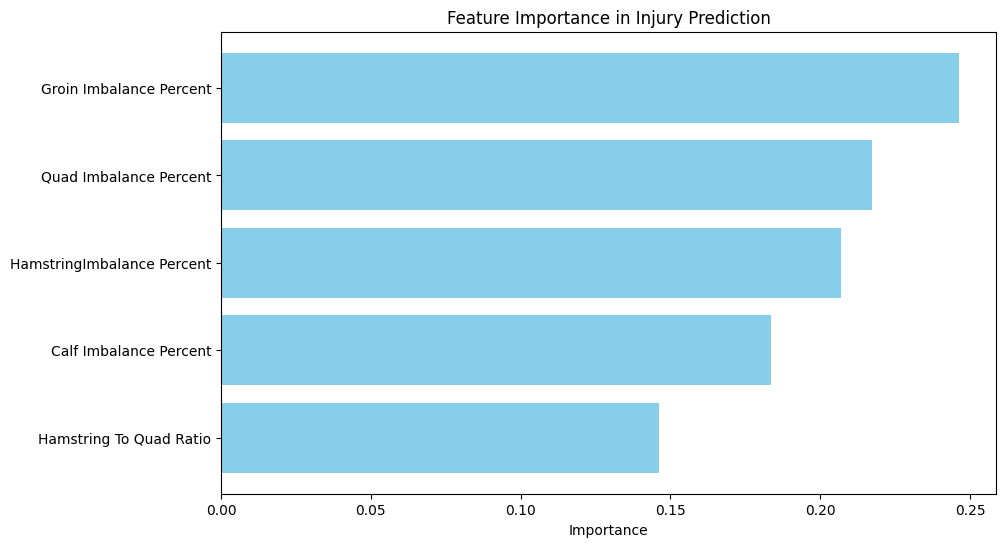

In [24]:
# Install necessary libraries if not already installed
#!pip install -U scikit-learn imbalanced-learn matplotlib pandas

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Load your datasets
injury_history = pd.read_csv(r'C:\APPLIED DATA SCIENCE(1ST SEM)\OTHER DOCUMENTS\PERSONAL PROJECTS\SPORTS ANALYTICS\injury_history(injury_history).csv', encoding='ISO-8859-1')
muscle_imbalance = pd.read_csv(r'C:\APPLIED DATA SCIENCE(1ST SEM)\OTHER DOCUMENTS\PERSONAL PROJECTS\SPORTS ANALYTICS\injury_history(muscle_imbalance_data).csv', encoding='ISO-8859-1')

# Convert dates to datetime format
injury_history['Injury Date'] = pd.to_datetime(injury_history['Injury Date'])
muscle_imbalance['Date Recorded'] = pd.to_datetime(muscle_imbalance['Date Recorded'])

# Create a recent injury indicator (e.g., past 1 year from last recorded date in muscle_imbalance)
recent_date_threshold = muscle_imbalance['Date Recorded'].max() - pd.DateOffset(years=1)
injury_history['Recent Injury'] = injury_history['Injury Date'] >= recent_date_threshold

# Aggregate injury status by player (1 if injured in the past year, otherwise 0)
injury_status = injury_history.groupby('Player.ID')['Recent Injury'].max().astype(int).reset_index()
injury_status.columns = ['Player.ID', 'Injury']  # 1 for injured, 0 for not injured

# Merge injury status with muscle imbalance data
merged_data = muscle_imbalance.merge(injury_status, on='Player.ID', how='left')
merged_data['Injury'] = merged_data['Injury'].fillna(0)  # Players without recent injuries get 0

# Define feature columns and target column
feature_columns = [
    'Hamstring To Quad Ratio', 
    'Quad Imbalance Percent', 
    'HamstringImbalance Percent', 
    'Calf Imbalance Percent', 
    'Groin Imbalance Percent'
]
target_column = 'Injury'

# Prepare features and target
X = merged_data[feature_columns].fillna(0)  # Fill missing values in features
y = merged_data[target_column].astype(int)

# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize and train the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Predict on the test set and evaluate
y_pred = rf_model.predict(X_test)
print("Injury Prediction Model Performance with SMOTE Oversampling:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Feature Importance Visualization
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({'Feature': feature_columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.title("Feature Importance in Injury Prediction")
plt.show()


## 4 GridSearchCV with SMOTE and Cross-Validation
Code: Combines SMOTE, hyperparameter tuning (GridSearchCV), and cross-validation for comprehensive model optimization.
Output: The model shows balanced accuracy and precision-recall scores across classes, indicating strong model performance.
Pros: Best overall approach since it addresses class imbalance, optimizes hyperparameters, and uses cross-validation for evaluation.
Cons: Computationally intensive, but the model is optimized for both class balance and accuracy.

Best parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 150}
Injury Prediction Model Performance with Reduced Overfitting:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        27

    accuracy                           1.00        52
   macro avg       1.00      1.00      1.00        52
weighted avg       1.00      1.00      1.00        52

Accuracy Score: 1.0
Confusion Matrix:
 [[25  0]
 [ 0 27]]


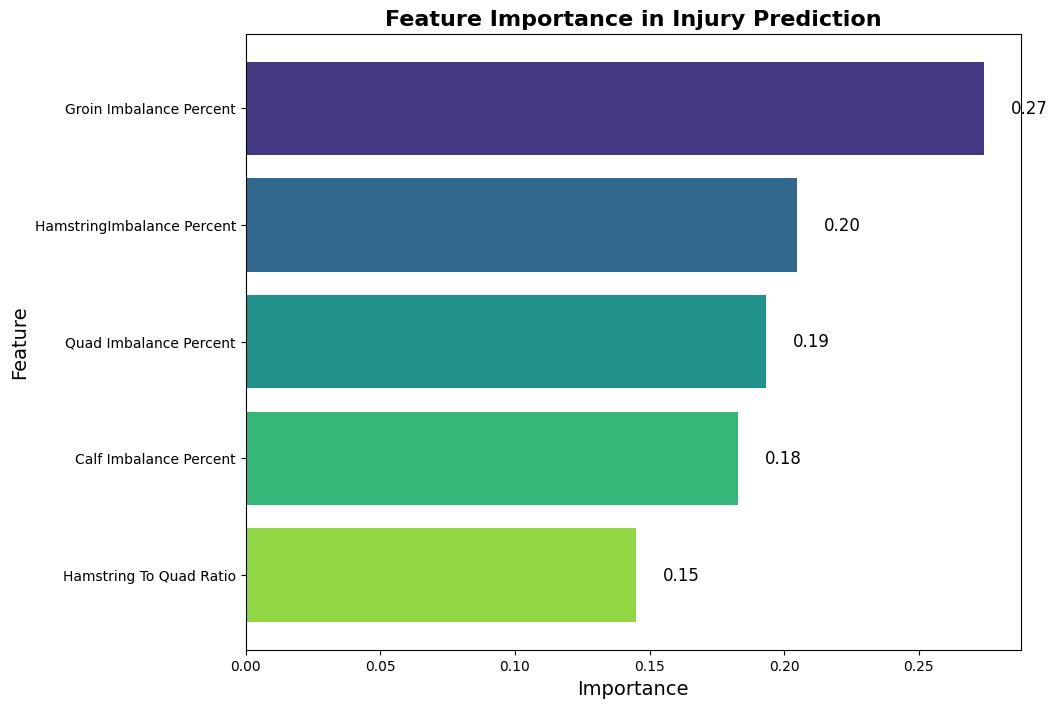

In [10]:
# Install necessary libraries if not already installed
#!pip install -U scikit-learn imbalanced-learn matplotlib pandas

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Load your datasets
injury_history = pd.read_csv(r'C:\APPLIED DATA SCIENCE(1ST SEM)\OTHER DOCUMENTS\PERSONAL PROJECTS\SPORTS ANALYTICS\injury_history(injury_history).csv', encoding='ISO-8859-1')
muscle_imbalance = pd.read_csv(r'C:\APPLIED DATA SCIENCE(1ST SEM)\OTHER DOCUMENTS\PERSONAL PROJECTS\SPORTS ANALYTICS\injury_history(muscle_imbalance_data).csv', encoding='ISO-8859-1')


# Convert dates to datetime format
injury_history['Injury Date'] = pd.to_datetime(injury_history['Injury Date'])
muscle_imbalance['Date Recorded'] = pd.to_datetime(muscle_imbalance['Date Recorded'])

# Create a recent injury indicator (e.g., past 1 year from the last recorded date in muscle_imbalance)
recent_date_threshold = muscle_imbalance['Date Recorded'].max() - pd.DateOffset(years=1)
injury_history['Recent Injury'] = injury_history['Injury Date'] >= recent_date_threshold

# Aggregate injury status by player (1 if injured in the past year, otherwise 0)
injury_status = injury_history.groupby('Player.ID')['Recent Injury'].max().astype(int).reset_index()
injury_status.columns = ['Player.ID', 'Injury']  # 1 for injured, 0 for not injured

# Merge injury status with muscle imbalance data
merged_data = muscle_imbalance.merge(injury_status, on='Player.ID', how='left')
merged_data['Injury'] = merged_data['Injury'].fillna(0)  # Players without recent injuries get 0

# Define feature columns and target column
feature_columns = [
    'Hamstring To Quad Ratio', 
    'Quad Imbalance Percent', 
    'HamstringImbalance Percent', 
    'Calf Imbalance Percent', 
    'Groin Imbalance Percent'
]
target_column = 'Injury'

# Prepare features and target
X = merged_data[feature_columns].fillna(0)
y = merged_data[target_column].astype(int)

# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Perform Grid Search to tune hyperparameters
param_grid = {
    'n_estimators': [50, 100, 150],  # Reduce the number of trees to prevent overfitting
    'max_depth': [5, 10, 15],        # Limit the depth of each tree
    'max_features': ['sqrt', 'log2'], # Limit the number of features considered at each split
    'min_samples_split': [10, 20],    # Increase the minimum samples per split
    'min_samples_leaf': [5, 10]       # Increase the minimum samples per leaf
}

# Use GridSearchCV for cross-validated hyperparameter tuning
grid_search = GridSearchCV(RandomForestClassifier(random_state=42, class_weight='balanced'), 
                           param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters from GridSearch
print("Best parameters:", grid_search.best_params_)

# Train the RandomForest model with the best hyperparameters
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)

# Predict on the test set and evaluate
y_pred = best_rf_model.predict(X_test)
print("Injury Prediction Model Performance with Reduced Overfitting:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Feature Importance Visualization
feature_importances = best_rf_model.feature_importances_
importance_df = pd.DataFrame({'Feature': feature_columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

import matplotlib.pyplot as plt
import seaborn as sns

# Set a color palette
colors = sns.color_palette("viridis", len(importance_df))

# Plot feature importances with enhancements
plt.figure(figsize=(10, 8))
bars = plt.barh(importance_df['Feature'], importance_df['Importance'], color=colors)
plt.gca().invert_yaxis()
plt.xlabel("Importance", fontsize=14)
plt.ylabel("Feature", fontsize=14)
plt.title("Feature Importance in Injury Prediction", fontsize=16, fontweight='bold')

# Add value labels to each bar
for bar in bars:
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.2f}', va='center', fontsize=12)

plt.show()





## 5 Best Hyperparameters + Stratified 10-Fold Cross-Validation
1. Code: Uses the best parameters from GridSearchCV with 10-fold stratified cross-validation to ensure a balanced sample in each fold.
2. Output: High accuracy across folds with balanced class representation.
3. Pros: Most robust approach for evaluating performance on imbalanced data.
4. Cons: Very computationally expensive, but yields highly reliable performance estimates.

In [26]:
from sklearn.model_selection import cross_val_score

# Initialize the RandomForest model with the best hyperparameters
best_rf_model = RandomForestClassifier(
    max_depth=5, max_features='sqrt', min_samples_leaf=5, 
    min_samples_split=10, n_estimators=150, random_state=42, class_weight='balanced'
)

# Perform 5-fold cross-validation on the resampled dataset
cv_scores = cross_val_score(best_rf_model, X_resampled, y_resampled, cv=5, scoring='accuracy')
print("5-Fold Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))


5-Fold Cross-Validation Scores: [0.75       0.98076923 0.96153846 0.5        1.        ]
Mean CV Accuracy: 0.8384615384615385


In [27]:
from sklearn.model_selection import StratifiedKFold

# Initialize 10-fold stratified cross-validation
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform stratified cross-validation
cv_scores_stratified = cross_val_score(best_rf_model, X_resampled, y_resampled, cv=stratified_kfold, scoring='accuracy')
print("10-Fold Stratified Cross-Validation Scores:", cv_scores_stratified)
print("Mean Stratified CV Accuracy:", np.mean(cv_scores_stratified))


10-Fold Stratified Cross-Validation Scores: [1.         1.         0.92307692 1.         1.         1.
 0.96153846 1.         1.         1.        ]
Mean Stratified CV Accuracy: 0.9884615384615385


Best Approach: The fourth approach (SMOTE + GridSearchCV + Cross-Validation) is the most balanced and effective model for this task. It uses SMOTE for balancing, tunes the model with GridSearchCV, and evaluates it with cross-validation.
Most Robust Evaluation: The fifth approach with stratified 10-fold cross-validation is also excellent for final validation, as it ensures each fold has balanced classes, but it may be redundant if the fourth approach yields stable results.

In [28]:
# Ensure the model is fitted before using it in predictions
best_rf_model.fit(X_train, y_train)

# Define function to predict injury risk for specific players and retrieve injury history
def predict_injury_for_players(player_names, muscle_data, injury_history, model, feature_columns):
    results = []

    for player_name in player_names:
        # Filter muscle imbalance data for the player
        player_data = muscle_data[muscle_data['Player Name'] == player_name]
        
        # Check if player data is available in muscle imbalance dataset
        if player_data.empty:
            print(f"No muscle imbalance data found for player: {player_name}")
            continue

        # Prepare features for prediction
        player_features = player_data[feature_columns].fillna(0)
        
        # Predict injury probability
        injury_probability = model.predict_proba(player_features)[:, 1]  # Probability of injury (class 1)
        
        # Filter injury history for the player
        player_injury_history = injury_history[injury_history['Name'] == player_name]
        
        # Format results
        player_result = {
            "Player Name": player_name,
            "Injury Probability": injury_probability[0],  # Take the first probability if there are multiple rows
            "Injury History": player_injury_history[['Injury Type', 'Body Part', 'Injury Date', 'Severity', 'Recovery Time (days)', 'Additional Notes']]
        }
        results.append(player_result)
        
        # Display the prediction and injury history
        print(f"\nPlayer: {player_name}")
        print(f"Injury Prediction Probability: {injury_probability[0]:.2f}")
        print("Injury History:")
        if not player_injury_history.empty:
            print(player_injury_history[['Injury Type', 'Body Part', 'Injury Date', 'Severity', 'Recovery Time (days)', 'Additional Notes']])
        else:
            print("No past injury history found.")
    
    return results

# Example usage of the function
player_names = ["Miles Richardson", "John Doe"]  # Replace with actual player names in your dataset
predictions = predict_injury_for_players(player_names, muscle_imbalance, injury_history, best_rf_model, feature_columns)



Player: Miles Richardson
Injury Prediction Probability: 1.00
Injury History:
   Injury Type Body Part Injury Date Severity  Recovery Time (days)  \
11  Tendonitis  Shoulder  2023-07-05      NaN                     9   

                                     Additional Notes  
11  Rotator cuff tendonitis due to overuse. Anti-i...  
No muscle imbalance data found for player: John Doe


In [29]:
# Function to predict injury risk for specific players and retrieve injury history
def predict_injury_for_players(player_names, muscle_data, injury_history, model, feature_columns, threshold=0.5):
    results = []

    for player_name in player_names:
        # Filter muscle imbalance data for the player
        player_data = muscle_data[muscle_data['Player Name'] == player_name]
        
        # Check if player data is available in muscle imbalance dataset
        if player_data.empty:
            print(f"No muscle imbalance data found for player: {player_name}")
            continue

        # Prepare features for prediction
        player_features = player_data[feature_columns].fillna(0)
        
        # Predict injury probability
        injury_probability = model.predict_proba(player_features)[:, 1]  # Probability of injury (class 1)
        
        # Determine injury prediction message
        injury_prediction_message = (
            "This player is likely to be injured based on our predictions."
            if injury_probability[0] >= threshold
            else "This player is not likely to be injured based on our predictions."
        )
        
        # Filter injury history for the player
        player_injury_history = injury_history[injury_history['Name'] == player_name]
        
        # Format results
        player_result = {
            "Player Name": player_name,
            "Injury Probability": injury_probability[0],  # Take the first probability if there are multiple rows
            "Injury Prediction": injury_prediction_message,
            "Injury History": player_injury_history[['Injury Type', 'Body Part', 'Injury Date', 'Severity', 'Recovery Time (days)', 'Additional Notes']] if not player_injury_history.empty else "No past injury history found."
        }
        results.append(player_result)
        
        # Display the prediction, injury prediction message, and injury history
        print(f"\nPlayer: {player_name}")
        print(f"Injury Prediction Probability: {injury_probability[0]:.2f}")
        print(injury_prediction_message)
        print("Injury History:")
        if not player_injury_history.empty:
            print(player_injury_history[['Injury Type', 'Body Part', 'Injury Date', 'Severity', 'Recovery Time (days)', 'Additional Notes']])
        else:
            print("No past injury history found.")
    
    return results

# Example usage of the function
player_names = ["Brandon Mitchell", "John Doe"]  # Replace with actual player names in your dataset
predictions = predict_injury_for_players(player_names, muscle_imbalance, injury_history, best_rf_model, feature_columns)



Player: Brandon Mitchell
Injury Prediction Probability: 1.00
This player is likely to be injured based on our predictions.
Injury History:
   Injury Type  Body Part Injury Date Severity  Recovery Time (days)  \
18      Sprain       Knee  2023-01-02  Grade 2                    55   
19      Strain  Hamstring  2023-04-24  Grade 1                    10   
20      Sprain       Knee  2023-06-26  Grade 3                   150   

                                     Additional Notes  
18  Grade 2 knee sprain. Partial tear of the media...  
19  Grade 1 hamstring strain, involving minimal te...  
20  Complete tear of the posterior cruciate ligame...  
No muscle imbalance data found for player: John Doe


c:\Users\mihir\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\mihir\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\mihir\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\mihir\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\mihir\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\mihir\anaconda3\Lib\site-packages\sklearn\base.py:4

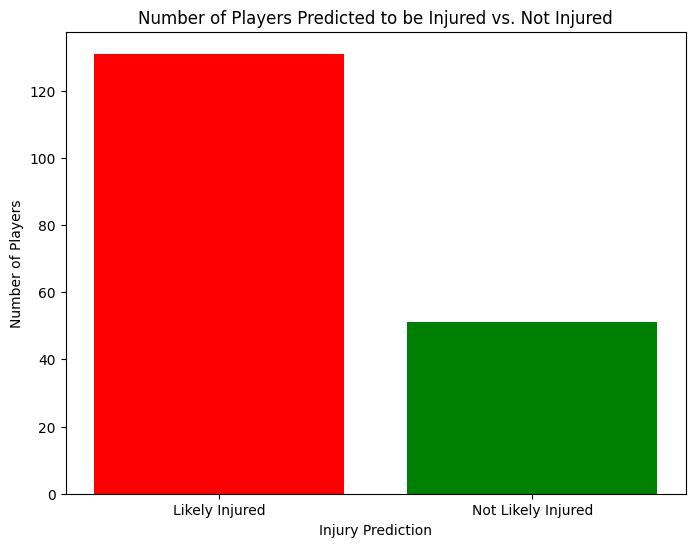

In [30]:
import matplotlib.pyplot as plt

# Function to predict injury risk for all players and count those likely to be injured
def predict_injury_counts(muscle_data, model, feature_columns, threshold=0.5):
    injury_counts = {"Likely Injured": 0, "Not Likely Injured": 0}

    # Iterate through each player
    for index, player_data in muscle_data.iterrows():
        # Prepare player features for prediction
        player_features = player_data[feature_columns].fillna(0).values.reshape(1, -1)

        # Predict injury probability
        injury_probability = model.predict_proba(player_features)[:, 1][0]  # Probability of injury (class 1)

        # Classify as "Likely Injured" or "Not Likely Injured" based on the threshold
        if injury_probability >= threshold:
            injury_counts["Likely Injured"] += 1
        else:
            injury_counts["Not Likely Injured"] += 1

    return injury_counts

# Get the count of players likely to be injured vs. not likely to be injured
injury_counts = predict_injury_counts(muscle_imbalance, best_rf_model, feature_columns)

# Plot the results
plt.figure(figsize=(8, 6))
plt.bar(injury_counts.keys(), injury_counts.values(), color=['red', 'green'])
plt.xlabel("Injury Prediction")
plt.ylabel("Number of Players")
plt.title("Number of Players Predicted to be Injured vs. Not Injured")
plt.show()


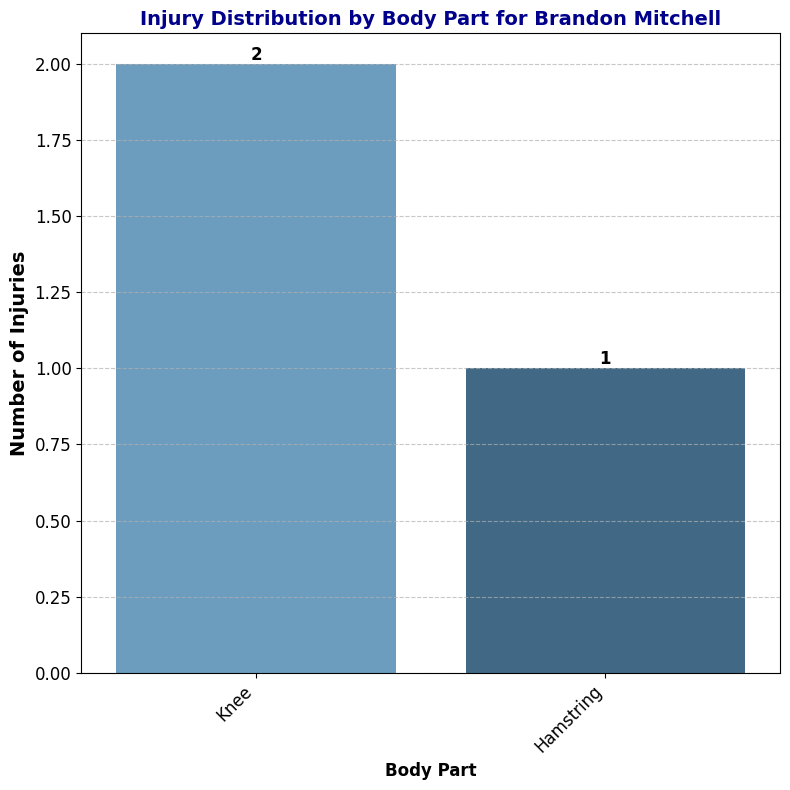

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot injury distribution by body part for a specific player
def plot_injury_history(injury_history):
    # Prompt the user to enter a player's name
    player_name = input("Enter the player's name to view their injury history: ")
    
    # Filter the injury history data for the specified player
    player_injury_history = injury_history[injury_history['Name'] == player_name]
    
    # Check if there is any injury history for the player
    if player_injury_history.empty:
        print(f"No injury history found for player: {player_name}")
        return
    
    # Count injuries by body part
    injury_counts = player_injury_history['Body Part'].value_counts()
    
    # Plot the results with custom styling
    plt.figure(figsize=(8, 8))
    sns.barplot(x=injury_counts.index, y=injury_counts.values, palette="Blues_d")
    
    # Customize the plot
    plt.xlabel("Body Part", fontsize=12, fontweight='bold')
    plt.ylabel("Number of Injuries", fontsize=14, fontweight='bold')
    plt.title(f"Injury Distribution by Body Part for {player_name}", fontsize=14, fontweight='bold', color='darkblue')
    plt.xticks(rotation=45, ha='right', fontsize=12, fontweight='medium')
    plt.yticks(fontsize=12)
    
    # Display value labels on each bar
    for index, value in enumerate(injury_counts.values):
        plt.text(index, value + 0.0, str(value), ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')
    
    # Show grid for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Display the plot
    plt.tight_layout()
    plt.show()

# Run the function
plot_injury_history(injury_history)


In [18]:
# Define function to predict injury risk and determine if a player should play in the next game
def can_play_next_game(player_names, muscle_data, injury_history, model, feature_columns, threshold=0.5):
    results = []

    for player_name in player_names:
        # Filter muscle imbalance data for the player
        player_data = muscle_data[muscle_data['Player Name'] == player_name]
        
        # Check if player data is available in muscle imbalance dataset
        if player_data.empty:
            print(f"No muscle imbalance data found for player: {player_name}")
            continue

        # Prepare features for prediction
        player_features = player_data[feature_columns].fillna(0)
        
        # Predict injury probability
        injury_probability = model.predict_proba(player_features)[:, 1][0]  # Probability of injury (class 1)
        
        # Determine if the player should play based on the threshold
        can_play = injury_probability < threshold  # True if below threshold, meaning low risk
        
        # Filter injury history for the player
        player_injury_history = injury_history[injury_history['Name'] == player_name]
        
        # Format results
        player_result = {
            "Player Name": player_name,
            "Injury Probability": injury_probability,
            "Can Play": can_play,
            "Injury History": player_injury_history[['Injury Type', 'Body Part', 'Injury Date', 'Severity', 'Recovery Time (days)', 'Additional Notes']]
        }
        results.append(player_result)
        
        # Display the prediction, recommendation, and injury history
        print(f"\nPlayer: {player_name}")
        print(f"Injury Prediction Probability: {injury_probability:.2f}")
        print(f"Recommendation: {'Play' if can_play else 'Rest or Evaluate Further'}")
        print("Injury History:")
        if not player_injury_history.empty:
            print(player_injury_history[['Injury Type', 'Body Part', 'Injury Date', 'Severity', 'Recovery Time (days)', 'Additional Notes']])
        else:
            print("No past injury history found.")
    
    return results

# Example usage of the function
player_names = ["Brandon Mitchell"]  
predictions = can_play_next_game(player_names, muscle_imbalance, injury_history, best_rf_model, feature_columns, threshold=0.5)



Player: Brandon Mitchell
Injury Prediction Probability: 1.00
Recommendation: Rest or Evaluate Further
Injury History:
   Injury Type  Body Part Injury Date Severity  Recovery Time (days)  \
18      Sprain       Knee  2023-01-02  Grade 2                    55   
19      Strain  Hamstring  2023-04-24  Grade 1                    10   
20      Sprain       Knee  2023-06-26  Grade 3                   150   

                                     Additional Notes  
18  Grade 2 knee sprain. Partial tear of the media...  
19  Grade 1 hamstring strain, involving minimal te...  
20  Complete tear of the posterior cruciate ligame...  
